# The Hamblog
By Kyle Hambrook

# Properties of Sample Correlation as an Estimator


### I. Sample Correlation $r_n$ Converges to Correlation $\rho$

If the sample size $n$ is large, we would hope the sample correlation $r_n$ is close to the correlation $\rho$. Thankfully, that's what happens:

<strong> Theorem 1.</strong>
Assume $E X$, $E Y$, $E XY$, $E X^2$, $E Y^2$ are all finite. Assume $\text{Var} X$ and $\text{Var} Y$ are non-zero.
Let $(X_i)_{i=1}^{\infty} \sim_{iid} X$ and $(Y_i)_{i=1}^{\infty} \sim_{iid} Y$ be infinite random samples. Then 
$$r_n \to \rho \quad \text{in probability}.$$

The conclusion means that for any $\epsilon > 0$, the probability that $|r_n - \rho| < \epsilon$ approaches $1$ as $n$ approaches $\infty$.

<em>Proof.</em> 
Write
$$
r_n = \frac{  \frac{1}{n}\sum_{i=1}^{n} X_i Y_i - \overline{X} \overline{Y}]}{( (\frac{1}{n}\sum_{i=1}^{n} X_i^2 - \overline{X}^2) (\frac{1}{n}\sum_{i=1}^{n} Y_i^2 - \overline{Y}^2)  )^{1/2}}
$$
By the law of large numbers, we have the following convergence in probability statements: $\overline{X} \rightarrow E X$, $\overline{Y} \rightarrow E Y$, $\frac{1}{n}\sum_{i=1}^{n} X_i Y_i \rightarrow E XY$, $\frac{1}{n}\sum_{i=1}^{n} X_i^2 \rightarrow E X^2$, $\frac{1}{n}\sum_{i=1}^{n} Y_i^2 \rightarrow E Y^2$. Now use the continuous mapping theorem, Slutsky's theorem, "convergence in probability implies convergence in distribution", and "convergence in distribution to a constant implies convergence in probability."  QED.

We can state the conclusion of Theorem 1 by saying $r_n$ is a consistent estimator of $\rho$. In general, an estimator $T_n$ of a parameter $\theta$ is said to be consistent if $T_n \to \theta$ in probability as $n \to \infty$. 

### II. Python Example 1: Sample Correlation $r_n$ Converges to Correlation $\rho$

(X,Y) multivariate normal, true correlation rho(X,Y) =  0.5
plot r_n(X,Y) = sample correlation vs n = sample size


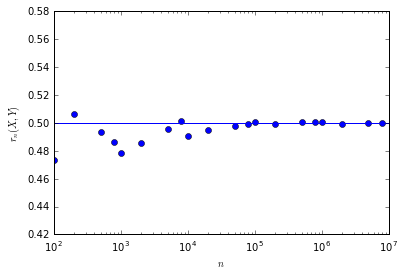

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def samp_corr( X,Y ):
    #X,Y vectors length n
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    numerator = np.mean((X-mean_X)*(Y-mean_Y))
    denominator = np.sqrt(np.mean((X-mean_X)**2) * np.mean((Y-mean_Y)**2))
    return numerator/denominator;

samplesizes = []
for k in range(2,7):
    samplesizes.append(10**k)
    samplesizes.append(2*10**k)
    samplesizes.append(5*10**k)
    samplesizes.append(8*10**k)
rho = 0.5
cov = np.array( [[1,rho],[rho,1]] )

r_n = []    
for n in samplesizes:
    XY = np.random.multivariate_normal([0,0],cov,n)
    X = XY[:,0]
    Y = XY[:,1]
    r_x_y = samp_corr(X,Y)
    r_n.append(r_x_y)

print "(X,Y) multivariate normal, true correlation rho(X,Y) = ",rho
print "plot r_n(X,Y) = sample correlation vs n = sample size"
    
#from matplotlib import pyplot
fig = plt.figure()
ax = plt.gca()
plt.plot(samplesizes,r_n,"o")
plt.axhline(rho)
plt.ylim([0.42,0.58])
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$r_n(X,Y)$')

#ax.scatter(data['o_value'] ,data['time_diff_day'] , c='blue', alpha=0.05, edgecolors='none')
ax.set_xscale('log')    

### III. Expected Sample Correlation $E(r_n)$ Converges to Correlation $\rho$

<strong> Corollary of Theorem 1. </strong>
Under the hypothesis of Theorem 1, we have
$$E(r_n) \rightarrow \rho.$$

<em> Proof. </em>
Theorem 1 gives $r_n \to \rho$ in probability. Since $|r_n| \leq 1$, the dominated convergence theorem can be applied to give $E r_n \rightarrow \rho$. QED.

We can state the conclusion $E(r_n) \rightarrow \rho$ by saying $r_n$ is an asymptotically unbiased estimator of $\rho$. In general, an estimator $T_n$ of a parameter $\theta$ is said to be asymptotically unbiased if $E (T_n) \to \theta$ as $n \to \infty$. 

We have defined asymptotically unbiased before defining unbiased. We rectify this now. 

An estimator $T_n$ of a parameter $\theta$ is said to be unbiased if $E (T_n) = \theta$, otherwise it is called biased. 

<!--It is natural to want our estimators to be unbiased.--> 

The sample mean is an unbiased estimator of the mean. Given $X_1,\ldots,X_n \sim_\text{iid} X$, 
$$
E\left(\overline{X}\right) = E\left( \frac{1}{n} \sum_{i=1}^{n} X_i \right) = \frac{1}{n} \sum_{i=1}^{n} E( X_i ) = \frac{1}{n} \sum_{i=1}^{n} E( X ) = E(X).
$$

As we have defined it, the sample variance $S_X^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline{X})^2$ is an unbiased estimator of $\sigma^2 = \text{Var}(X)$. It may seem more natural to define the sample variance as $\frac{1}{n} \sum_{i=1}^{n} (X_i - \overline{X})^2$, but this is not an unbiased estimator of $\sigma^2 = \text{Var}(X)$. The proof of these assertions is symbol pushing. 
See <a href="http://isites.harvard.edu/fs/docs/icb.topic515975.files/Proof%20that%20Sample%20Variance%20is%20Unbiased.pdf">here</a>.

The sample correlation $r_n$ is a biased estimator of the correlation $\rho$. In fact, 
$$
E(r_n) = \rho - \frac{\rho(1-\rho^2)}{2n} + \text{O}\left(\frac{\rho}{n^2}\right). 
$$
The proof takes some work. See, for example, the book of Stuart and Ord (1987, Section 16.32) or the orginal paper of Fisher (1915).

### IV. Python Example 2: Expected Sample Correlation $E(r_n)$ Converges to Correlation $\rho$

(X,Y) multivariate normal, true correlation rho(X,Y) =  0.5
plot E(r_n(X,Y)) = expected sample correlation vs n = sample size


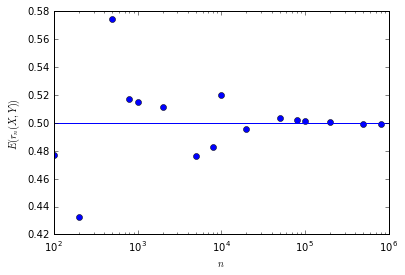

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

samplesizes = []
for k in range(2,6):
    samplesizes.append(10**k)
    samplesizes.append(2*10**k)
    samplesizes.append(5*10**k)
    samplesizes.append(8*10**k)
    
rho = 0.5
cov = np.array( [[1,rho],[rho,1]] )
K = 500 #repeated sample size
E_r_n = []  

#Fix n in samplesize. 
#We generate a sample of (X,Y) of size n 
#and compute the sample correlation r_n(X,Y).
#We do this K times for the fixed n.
#We end up with K values for r_n(X,Y)
#The mean of these K values is viewed 
#as the expectation of r_n(X,Y).
#We call it E_*(r_n(X,Y))
#It is not actually equal to E(r_n(X,Y)),
#but it converges to E(r_n(X,Y)) as K gets large,
#by the law of large numbers


for n in samplesizes:
    for k in xrange(1,K+1):
        r_n = []
        XY = np.random.multivariate_normal([0,0],cov,n)
        X = XY[:,0]
        Y = XY[:,1]
        mean_X = np.mean(X)
        mean_Y = np.mean(Y)
        r_x_y = np.mean((X-mean_X)*(Y-mean_Y)) 
        / np.sqrt(np.mean((X-mean_X)**2) 
                  * np.mean((Y-mean_Y)**2)) 
        r_n.append(r_x_y)
    E_r_n.append(np.mean(r_n))
        
print "(X,Y) multivariate normal, true correlation rho(X,Y) = ",rho
print "plot E(r_n(X,Y)) = expected sample correlation vs n = sample size"
    
#from matplotlib import pyplot
fig = plt.figure()
ax = plt.gca()
plt.plot(samplesizes,E_r_n,"o")
plt.axhline(rho)
plt.ylim([0.42,0.58])
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$E(r_n(X,Y))$')

#ax.scatter(data['o_value'] ,data['time_diff_day'] , 
#c='blue', alpha=0.05, edgecolors='none')
ax.set_xscale('log')    

### V. Remark on Python Example 2

We didn't actually compute $E(r_n)$. Instead we computed $E_*(r_n)$. The explanation follows.

Let the sample size $n$ be fixed. We generate a sample of $(X,Y)$ of size $n$ and compute the sample correlation $r_n(X,Y)$. We do this $K$ times for the fixed sample size $n$. We end up with $K$ values for $r_n(X,Y)$. The mean of these $K$ values is $E_*(r_n(X,Y))$. It is not actually equal to $E(r_n(X,Y))$, but it converges to $E(r_n(X,Y))$ as $K$ gets large, according to the law of large numbers. We take $K$ as large as possible such that the calcuation time is reasonable. In a later post, we will return to the problem of how large to take $K$.

This is an example of Monte Carlo simulation.

### VI. Appendix: Formal Definitions

We have used the concepts of estimators and parameters without formally defining them. This is because most users of statistics have reasonably good working defintions for these concepts. For completeness, we give formal definitions here. We also give formal definitions for a few other concepts.

A random vector $X = (X_1,\ldots,X_k)$ is a tuple whose components are random variables. 

Let $X$ be a random vector. 

If $X_1,\ldots,X_n \sim_{iid} X$ (that is, $X_1,\ldots, X_n$ are independent and all have the same distribution as $X$), then we say $X_1,\ldots,X_n$ is a random sample of $X$. An infinite sequence $(X_i)_{i=1}^{\infty} \sim_{iid} X$ is an infinite random sample of $X$.

If $T_n = f(X_1,\ldots,X_n)$ for some random sample $X_1,\ldots,X_n$ of $X$ and some Borel function $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$, then $T_n$ is called a statistic.

Let $\mathcal{P}$ be a collection of probability distributions. Let $g:\mathcal{P} \rightarrow \mathbb{R}^m$. For $P \in \mathcal{P}$, the value $\theta = g(P)$ is called a parameter of the distribution $P$. If $g$ is a one-to-one function, then we write $\Theta = g(\mathcal{P})$ and $\mathcal{P} = \{P_{\theta} : \theta \in \Theta\}$, and we call $\Theta$ the parameter space and $\mathcal{P}$ a parametric family. 

If $\mathcal{P}$ consists of all uni-variate normal distributions, then the mean $\mu$ and the variance $\sigma^2$ are parameters. The pair $(\mu,\sigma^2)$ is also a parameter and 
$\mathcal{P} = \{ N(\mu,\sigma^2) : (\mu,\sigma^2) \in \mathbb{R} \times (0,\infty)\}$
is a parametric family.

A statistic $T_n$ is called an estimator of a parameter $\theta$ if $T_n$ approximates $\theta$ in some sense. The concept of estimator does not have a more formal defintion.